# Project: Customer Segments Identification

![](https://alidropship.com/wp-content/uploads/2019/12/2.-Customer-Segmentation.jpg)

## Project Motivation
In this project, I employ several supervised algorithms to accurately model the value of customers to a business using relevant data of 3000 existing customers such as demographic, financial, transactions, etc. which has been provided to us by our anonymous client. The best candidate algorithm from preliminary results is chosen and then optimised this algorithm to best model the data.

This model was then applied to accurately identify the segment of 1000 potential new customers so as to show their value to the business and identify which of the new customers our client should target with marketing and advertising. 

## Libraries Used
* numpy
* pandas
* time
* seaborn 
* matplotlib.pyplot
* Scikitlearn

## Files in this repository
There are four spreadsheets associated with this project:

* CustomerDemographics: Demographics data for the 4000 existing customers.
* CustomerAddress: Address data for existing customers.
* Transactions: Showing the transactions data for the past 3 months.
* NewCustomerList: A new list of 1000 potential customers with their demographics and attributes

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as stats
%matplotlib inline 
import matplotlib.pyplot as plt
import os

# Step 1: Load the data

There are four spreadsheets associated with this project:

CustomerDemographics: Demographics data for the 4000 existing customers.

CustomerAddress: Address data for existing customers.

Transactions: Showing the transactions data for the past 3 months.

NewCustomerList: A new list of 1000 potential customers with their demographics and attributes

The client wants to know which of the new 1000 customers to target. The aim is to provide useful customer insights which could help optimise the allocation of resource for targeted marketing and improve performance by focusing on high value customers.

In [216]:
import os
  
# Function to Get the current 
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
# Driver's code
# Printing CWD before
current_path()
  
# Changing the CWD
os.chdir("C:/Users/preco/OneDrive/Desktop/ML with Python")
  
# Printing CWD after
current_path()

Current working directory before
C:\Users\preco\OneDrive\Desktop\ML with Python

Current working directory before
C:\Users\preco\OneDrive\Desktop\ML with Python



In [2]:
df = pd.read_excel('CustomerData.xlsx',sheet_name = ['Transactions','NewCustomerList','CustomerDemographic', 'CustomerAddress']) 
CustomerDemo_df = pd.read_excel('CustomerData.xlsx',sheet_name = 'CustomerDemographic')
Transactions_df = pd.read_excel('CustomerData.xlsx',sheet_name = 'Transactions')
CustomerAddress_df = pd.read_excel('CustomerData.xlsx',sheet_name = 'CustomerAddress')
NewCustomers_df = pd.read_excel('CustomerData.xlsx',sheet_name = 'NewCustomerList')

In [3]:
# Let's see the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print("The Customer Demographic dataset has %s rows and %s columns" %(CustomerDemo_df.shape[0], CustomerDemo_df.shape[1]))
print("The Transactions dataset has %s rows and %s columns"  %(Transactions_df.shape[0], Transactions_df.shape[1]))
print("The Customer Address dataset has %s rows and %s columns" %(CustomerAddress_df.shape[0], CustomerAddress_df.shape[1]))
print("The New Customers dataset has %s rows and %s columns"  %(NewCustomers_df.shape[0], NewCustomers_df.shape[1]))

The Customer Demographic dataset has 4000 rows and 13 columns
The Transactions dataset has 20000 rows and 19 columns
The Customer Address dataset has 3999 rows and 6 columns
The New Customers dataset has 1000 rows and 23 columns


# 1. Let us work on the Customer Demographic Spreadsheet

In [4]:
display(CustomerDemo_df.head(5))

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
#Let us see the data types
pd.DataFrame({"Data type":CustomerDemo_df.dtypes})

,Data type
customer_id,int64
first_name,object
last_name,object
gender,object
past_3_years_bike_related_purchases,int64
DOB,datetime64[ns]
job_title,object
job_industry_category,object
wealth_segment,object
deceased_indicator,object


In [6]:
# Let's get the perentage of Missing Data in the data
CustomerDemo_df.isnull().sum()
pd.DataFrame({"Missing Data (%)":CustomerDemo_df.isnull().sum()/len(CustomerDemo_df.index)*100})

,Missing Data (%)
customer_id,0.000
first_name,0.000
last_name,3.125
gender,0.000
past_3_years_bike_related_purchases,0.000
DOB,2.175
job_title,12.650
job_industry_category,16.400
wealth_segment,0.000
deceased_indicator,0.000


We can see the percentage of missing data. We will deal with these later

Let us deal with the genders and replace "Female","Femal" with "F and "Male" with "M"

In [7]:
CustomerDemo_df["gender"] = CustomerDemo_df["gender"].replace(to_replace =["Female","Femal"], value = "F")
CustomerDemo_df["gender"] = CustomerDemo_df['gender'].replace(to_replace =["Male"], value = "M")
CustomerDemo_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,F,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,M,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


We do not need the need the data where the "deceased indicator = Y". So will drop these rows of data. We will do this later

Let us drop some columns that will not be necsaary for our prediction

In [8]:
Final_Customer_Demo_df= CustomerDemo_df[["customer_id","gender","past_3_years_bike_related_purchases",
                                         "DOB","job_industry_category","wealth_segment","owns_car","tenure"]]

In [9]:
Final_Customer_Demo_df

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,F,93,1953-10-12,Health,Mass Customer,Yes,11.0
1,2,M,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
2,3,M,61,1954-01-20,Property,Mass Customer,Yes,15.0
3,4,M,33,1961-10-03,IT,Mass Customer,No,7.0
4,5,F,56,1977-05-13,NaN,Affluent Customer,Yes,8.0
...,...,...,...,...,...,...,...,...
3995,3996,F,8,1975-08-09,Health,Mass Customer,No,19.0
3996,3997,F,87,2001-07-13,Manufacturing,High Net Worth,Yes,1.0
3997,3998,U,60,NaT,IT,High Net Worth,No,NaN
3998,3999,M,11,1973-10-24,Manufacturing,Affluent Customer,Yes,10.0


# 2. Let us work on the Transaction Spreadsheet

In [10]:
pd.DataFrame({"Data type":Transactions_df.dtypes})

,Data type
transaction_id,int64
product_id,int64
customer_id,int64
transaction_date,datetime64[ns]
online_order,float64
order_status,object
brand,object
product_line,object
product_class,object
product_size,object


In [11]:
Transactions_df.isnull().sum()
pd.DataFrame({"Missing Data (%)":Transactions_df.isnull().sum()/len(Transactions_df.index)*100})

,Missing Data (%)
transaction_id,0.000
product_id,0.000
customer_id,0.000
transaction_date,0.000
online_order,1.800
order_status,0.000
brand,0.985
product_line,0.985
product_class,0.985
product_size,0.985


In [12]:
Transactions_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,NaN,NaN,NaN,NaN,NaN,NaN
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,NaN,NaN,NaN,NaN,NaN,NaN
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,NaN,NaN,NaN,NaN,NaN,NaN
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Let us work on the Customer Address Spreadsheet

In [13]:
CustomerAddress_df.isnull().sum()
pd.DataFrame({"Missing Data (%)":CustomerAddress_df.isnull().sum()/len(CustomerAddress_df.index)*100})

,Missing Data (%)
customer_id,0.0
address,0.0
postcode,0.0
state,0.0
country,0.0
property_valuation,0.0


Let us obtain the columns that will be used in the prediction model

In [14]:
Final_Customer_Address_df= CustomerAddress_df[["customer_id","postcode","state","property_valuation"]]

The names in some of the columns id mismatched. For example,Victoria and VIC seen in some columns mean the same thing. Let us replace these with state codes to make the state column uniform

In [15]:
Final_Customer_Address_df["state"] = Final_Customer_Address_df["state"].replace(to_replace =["Victoria"], value = "VIC")
Final_Customer_Address_df["state"] = Final_Customer_Address_df["state"].replace(to_replace =["New South Wales"], value = "NSW")
Final_Customer_Address_df

C:\Users\preco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\preco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,postcode,state,property_valuation
0,1,2016,NSW,10
1,2,2153,NSW,10
2,4,4211,QLD,9
3,5,2448,NSW,4
4,6,3216,VIC,9
...,...,...,...,...
3994,3999,3064,VIC,3
3995,4000,4511,QLD,6
3996,4001,2756,NSW,10
3997,4002,4032,QLD,7


**Let us see the number of customer that completed their order**

In [16]:
#define a function for plotting the order_status data
def plot_stacked_bar_charts(dataframe, title_, size_=(20,10), rot_=0, legend_ = "lower right"):
    #plot stacked bars with annotations
    ax =dataframe.plot(kind="bar",
                       stacked=True,
                       figsize=size_,
                       rot=rot_,
                       title=title_)
    #Annotate bars
    #annotate_stacked_bar_charts(ax, textsize=14)
    #Rename legend
    plt.legend(["Approved", "Cancelled"], loc=legend_)
    #Labels
    plt.ylabel("Pr(%)")
    plt.show()
    
# This function shows the values of the percentage calculated on the stacked bar charts
def annotate_stacked_bar_charts(ax, pad=0.99, colour="white", textsize=13):
    
    # Iterate over the plotted rectangles/bars
    for p in ax.patches:
        # Calculate annotation
        value=str(round(p.get_height(),1))
        
        # If value is 0, do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                           color=colour,size=textsize,
                          )

In [17]:
order_data = Transactions_df[["product_id","online_order","order_status"]]
order_data.head()

,product_id,online_order,order_status
0,2,0.0,Approved
1,3,1.0,Approved
2,37,0.0,Approved
3,88,0.0,Approved
4,78,1.0,Approved


In [18]:
order_d = order_data.groupby([order_data["order_status"], order_data["online_order"]])["product_id"].count().unstack(level=0)

In [19]:
order_d

order_status,Approved,Cancelled
online_order,,
0.0,9735,76
1.0,9732,97


In [20]:
order_type = ['Online', 'Not Online']

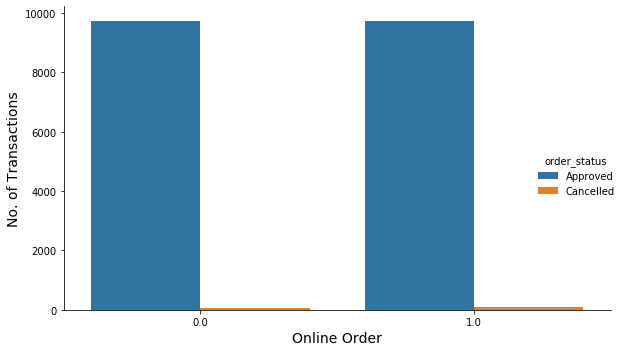

In [21]:
ax = sns.catplot( x='online_order',
             kind="count", 
             hue="order_status", 
             height=5, 
             aspect=1.5, 
             data=order_data)
plt.xlabel("Online Order", size=14)
plt.ylabel("No. of Transactions", size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

A very small percentage of the online and non-online transactions were cancelled. This means that more sales were made for "in-person" orders

We will drop the rows of data in which the order are cancelled. 

In [22]:
#Let us drop the transacctions that were canccelled because these transactions can not be used as successful
cancel_df = Transactions_df[ Transactions_df['order_status'] == "Cancelled"].index

In [23]:
# drop these row indexes
# from dataFrame
Transactions_df.drop(cancel_df, inplace = True)

In [24]:
Transactions_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,NaN,NaN,NaN,NaN,NaN,NaN
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,NaN,NaN,NaN,NaN,NaN,NaN
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,NaN,NaN,NaN,NaN,NaN,NaN
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,NaN,NaN,NaN,NaN,NaN,NaN


We will now obtain the profit made by the business per customer over the given period of time. This data would be the sum of the profits (list price - standard cost) made on all the transactions by a customer. This will be used together with the demographic and address spreadsheets to create features to be used in the prediction model. This column may be used as our target variable in our prediction model

In [25]:
Transactions_df["Profit_per_customer"] = Transactions_df["list_price"] - Transactions_df["standard_cost"]
Profit_per_customer = pd.DataFrame(Transactions_df["Profit_per_customer"].groupby
                                   (Transactions_df["customer_id"]).sum())
Profit_per_customer.head()

,Profit_per_customer
customer_id,
1,3018.09
2,2226.26
3,3362.81
4,220.57
5,2394.94


We will also obtain the number of transaction made per customer over the given period of time. This data would be used together with the demographic and address spreadsheets to create the prediction model. This column may be used as our target variable in our prediction model

In [26]:
Transactions_No = Transactions_df[["transaction_id","customer_id"]]

In [27]:
Transaction_per_customer = Transactions_No.groupby(Transactions_No["customer_id"]).count()
Transaction_per_customer.head()

,transaction_id
customer_id,
1,11
2,3
3,8
4,2
5,6


In [28]:
#mereg the No. of Transactions and trhe profit per customer columns
Transactions_Profit_per_Customer = pd.merge(Transaction_per_customer,Profit_per_customer, on ='customer_id')
Transactions_Profit_per_Customer.head()

,transaction_id,Profit_per_customer
customer_id,,
1,11,3018.09
2,3,2226.26
3,8,3362.81
4,2,220.57
5,6,2394.94


### Data merging

Now let us merge the data frame we want to use in the modelling

In [29]:
merged_data  = pd.merge(Final_Customer_Address_df,Transactions_Profit_per_Customer, on ='customer_id')
#pd.merge(train, categories_channel, left_index=True, right_index=True)

In [30]:
Existing_Customers_df = pd.merge(merged_data,Final_Customer_Demo_df, on = 'customer_id')
Existing_Customers_df.head()

,customer_id,postcode,state,property_valuation,transaction_id,Profit_per_customer,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,2016,NSW,10,11,3018.09,F,93,1953-10-12,Health,Mass Customer,Yes,11.0
1,2,2153,NSW,10,3,2226.26,M,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
2,4,4211,QLD,9,2,220.57,M,33,1961-10-03,IT,Mass Customer,No,7.0
3,5,2448,NSW,4,6,2394.94,F,56,1977-05-13,NaN,Affluent Customer,Yes,8.0
4,6,3216,VIC,9,5,3946.55,M,35,1966-09-16,Retail,High Net Worth,Yes,13.0


Let us transform the DOB column to the no. of years (age of the customers) using a reference date of 01/01/2021

In [31]:
Existing_Customers_df = Existing_Customers_df.dropna()

In [32]:
import datetime

In [33]:
#Define a function that converts the dates to months
def convert_date_to_years(reference_date, dataframe, column):
    """
    Input a column with timedeltas and return years
    """
    delta_time = REFERENCE_DATE - dataframe[column]
    years = (delta_time / np.timedelta64(1, "Y")).astype(int)
    
    #int returns the number of months as a whole number, not decimal
    
    return years

In [34]:
# Create reference date as provided
REFERENCE_DATE = datetime.datetime(2021,1,1)

In [35]:
Existing_Customers_df["DOB"] = pd.to_datetime(Existing_Customers_df["DOB"],format='%Y-%m-%d')

In [36]:
Existing_Customers_df["DOB"] = convert_date_to_years(REFERENCE_DATE, Existing_Customers_df, "DOB")

In [37]:
transactions_by_state = pd.DataFrame(Existing_Customers_df["transaction_id"].groupby(Existing_Customers_df["state"]).sum())
transactions_by_gender = pd.DataFrame(Existing_Customers_df["transaction_id"].groupby(Existing_Customers_df["gender"]).sum())
transactions_by_brand = pd.DataFrame(Existing_Customers_df["transaction_id"].groupby(Transactions_df["brand"]).sum())

C:\Users\preco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


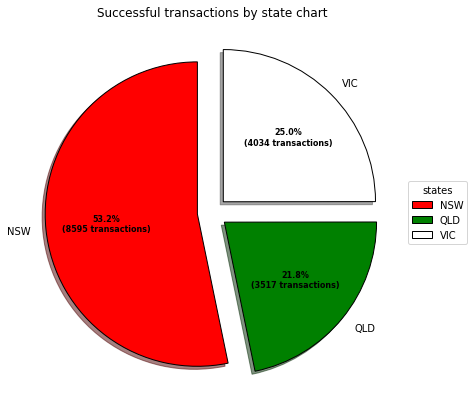

In [38]:
states = ['NSW', 'QLD', 'VIC']
# Creating explode data
explode = (0.1, 0.1, 0.1)  
# Creating color parameters
colors = ( "red", "green", "white", "indigo", "beige")  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} transactions)".format(pct, absolute) 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(transactions_by_state, 
                                  autopct = lambda pct: func(pct, transactions_by_state),
                                  explode = explode, 
                                  labels = states,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                 textprops = dict(color ="black"))  
# Adding legend
ax.legend(wedges, states,
          title ="states",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Successful transactions by state chart") 
# show plot
plt.show()

C:\Users\preco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


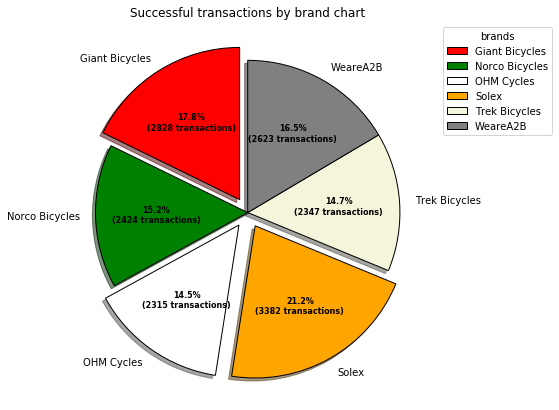

In [39]:
brands = ['Giant Bicycles','Norco Bicycles','OHM Cycles','Solex','Trek Bicycles','WeareA2B']
# Creating explode data
explode = (0.1, 0.0, 0.1, 0.1, 0.0, 0.0) 
# Creating color parameters
colors = ( "red", "green", "white", "orange", "beige", "grey") 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} transactions)".format(pct, absolute)  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(transactions_by_brand, 
                                  autopct = lambda pct: func(pct, transactions_by_brand),
                                  explode = explode, 
                                  labels = brands,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))  
# Adding legend
ax.legend(wedges, brands,
          title ="brands",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Successful transactions by brand chart") 
# show plot
plt.show()

# 2. Feature Engineering

Transform the owns_car column to Boolean through one hot encoding

In [40]:
#In the column has_gas, replace t with Tr`1ue or 1 and f with False or 0 . 
#This process is known as onehot encoding
Existing_Customers_df["owns_car"]=Existing_Customers_df["owns_car"].replace(["Yes", "No"],[1,0])

**Dealing with Categorical Data and Dummy Variables**

a. State Column

In [41]:
# Transform column into categorical data type
Existing_Customers_df["state"] = Existing_Customers_df["state"].astype("category")

In [42]:
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": Existing_Customers_df["state"].value_counts()})
# Create 3 dummy variables for each variable
state_dummies = pd.get_dummies(Existing_Customers_df["state"], prefix = "state")
# We rename columns for simplicity
state_dummies.columns = [col_name[:11] for col_name in state_dummies.columns]

b. Gender column

In [43]:
# Transform column into categorical data type
Existing_Customers_df["gender"] = Existing_Customers_df["gender"].astype("category")

In [44]:
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": Existing_Customers_df["gender"].value_counts()})
# Create 3 dummy variables for each variable
gender_dummies = pd.get_dummies(Existing_Customers_df["gender"], prefix = "gender")
# We rename columns for simplicity
gender_dummies.columns = [col_name[:11] for col_name in gender_dummies.columns]

c. Job_industry_category

In [45]:
# Transform column into categorical data type
Existing_Customers_df["job_industry_category"] = Existing_Customers_df["job_industry_category"].astype("category")

In [46]:
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": Existing_Customers_df["job_industry_category"].value_counts()})
# Create 9 dummy variables for each variable
job_industry_category_dummies = pd.get_dummies(Existing_Customers_df["job_industry_category"], prefix = None)
# We rename columns for simplicity
job_industry_category_dummies.columns = [col_name[:11] for col_name in job_industry_category_dummies.columns]

d. Wealth Segment

In [47]:
Existing_Customers_df["wealth_segment"] = Existing_Customers_df["wealth_segment"].astype("category")

In [48]:
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": Existing_Customers_df["wealth_segment"].value_counts()})

,Samples in category
Mass Customer,1425
High Net Worth,729
Affluent Customer,698


In [49]:
# Create 3 dummy variables for each variable
wealth_segment_dummies = pd.get_dummies(Existing_Customers_df["wealth_segment"], prefix = "Wealth_seg")
wealth_segment_dummies.columns = [col_name[:11] for col_name in wealth_segment_dummies.columns]

**Merge the dummy variables to main dataframe**

In [50]:
# Use common index to merge
Existing_Customers_df = pd.merge(Existing_Customers_df, state_dummies, left_index=True, right_index=True)
Existing_Customers_df = pd.merge(Existing_Customers_df, gender_dummies, left_index=True, right_index=True)
Existing_Customers_df = pd.merge(Existing_Customers_df, job_industry_category_dummies, left_index=True, right_index=True)
Existing_Customers_df = pd.merge(Existing_Customers_df, wealth_segment_dummies, left_index=True, right_index=True)

In [51]:
#Let us remove the old categorical columns
Existing_Customers_df.drop(columns=["state","gender","job_industry_category","wealth_segment"],inplace=True)

# 3. Data Visualisation

In [52]:
Existing_Customers_df.describe()

,customer_id,postcode,property_valuation,transaction_id,Profit_per_customer,past_3_years_bike_related_purchases,DOB,owns_car,tenure,state_NSW,...,Financial S,Health,IT,Manufacturi,Property,Retail,Telecommuni,Wealth_seg_,Wealth_seg_,Wealth_seg_
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.00000,2852.000000
mean,1743.892006,2991.343268,7.493338,5.661641,3084.512546,48.907433,42.792076,0.509818,10.753857,0.533310,...,0.238079,0.184432,0.044530,0.245442,0.080645,0.106592,0.022090,0.244741,0.25561,0.499649
std,1013.214495,853.822607,2.837272,2.299138,1775.751036,28.566927,12.831062,0.499991,5.694096,0.498977,...,0.425982,0.387904,0.206306,0.430424,0.272337,0.308648,0.147001,0.430009,0.43628,0.500088
min,1.000000,2000.000000,1.000000,1.000000,15.080000,0.000000,18.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,857.500000,2197.000000,6.000000,4.000000,1807.767500,24.000000,33.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1731.500000,2768.000000,8.000000,5.000000,2823.870000,48.000000,43.000000,1.000000,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2626.250000,3756.250000,10.000000,7.000000,4117.882500,73.000000,52.000000,1.000000,16.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,3500.000000,4883.000000,12.000000,14.000000,11668.950000,99.000000,177.000000,1.000000,22.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


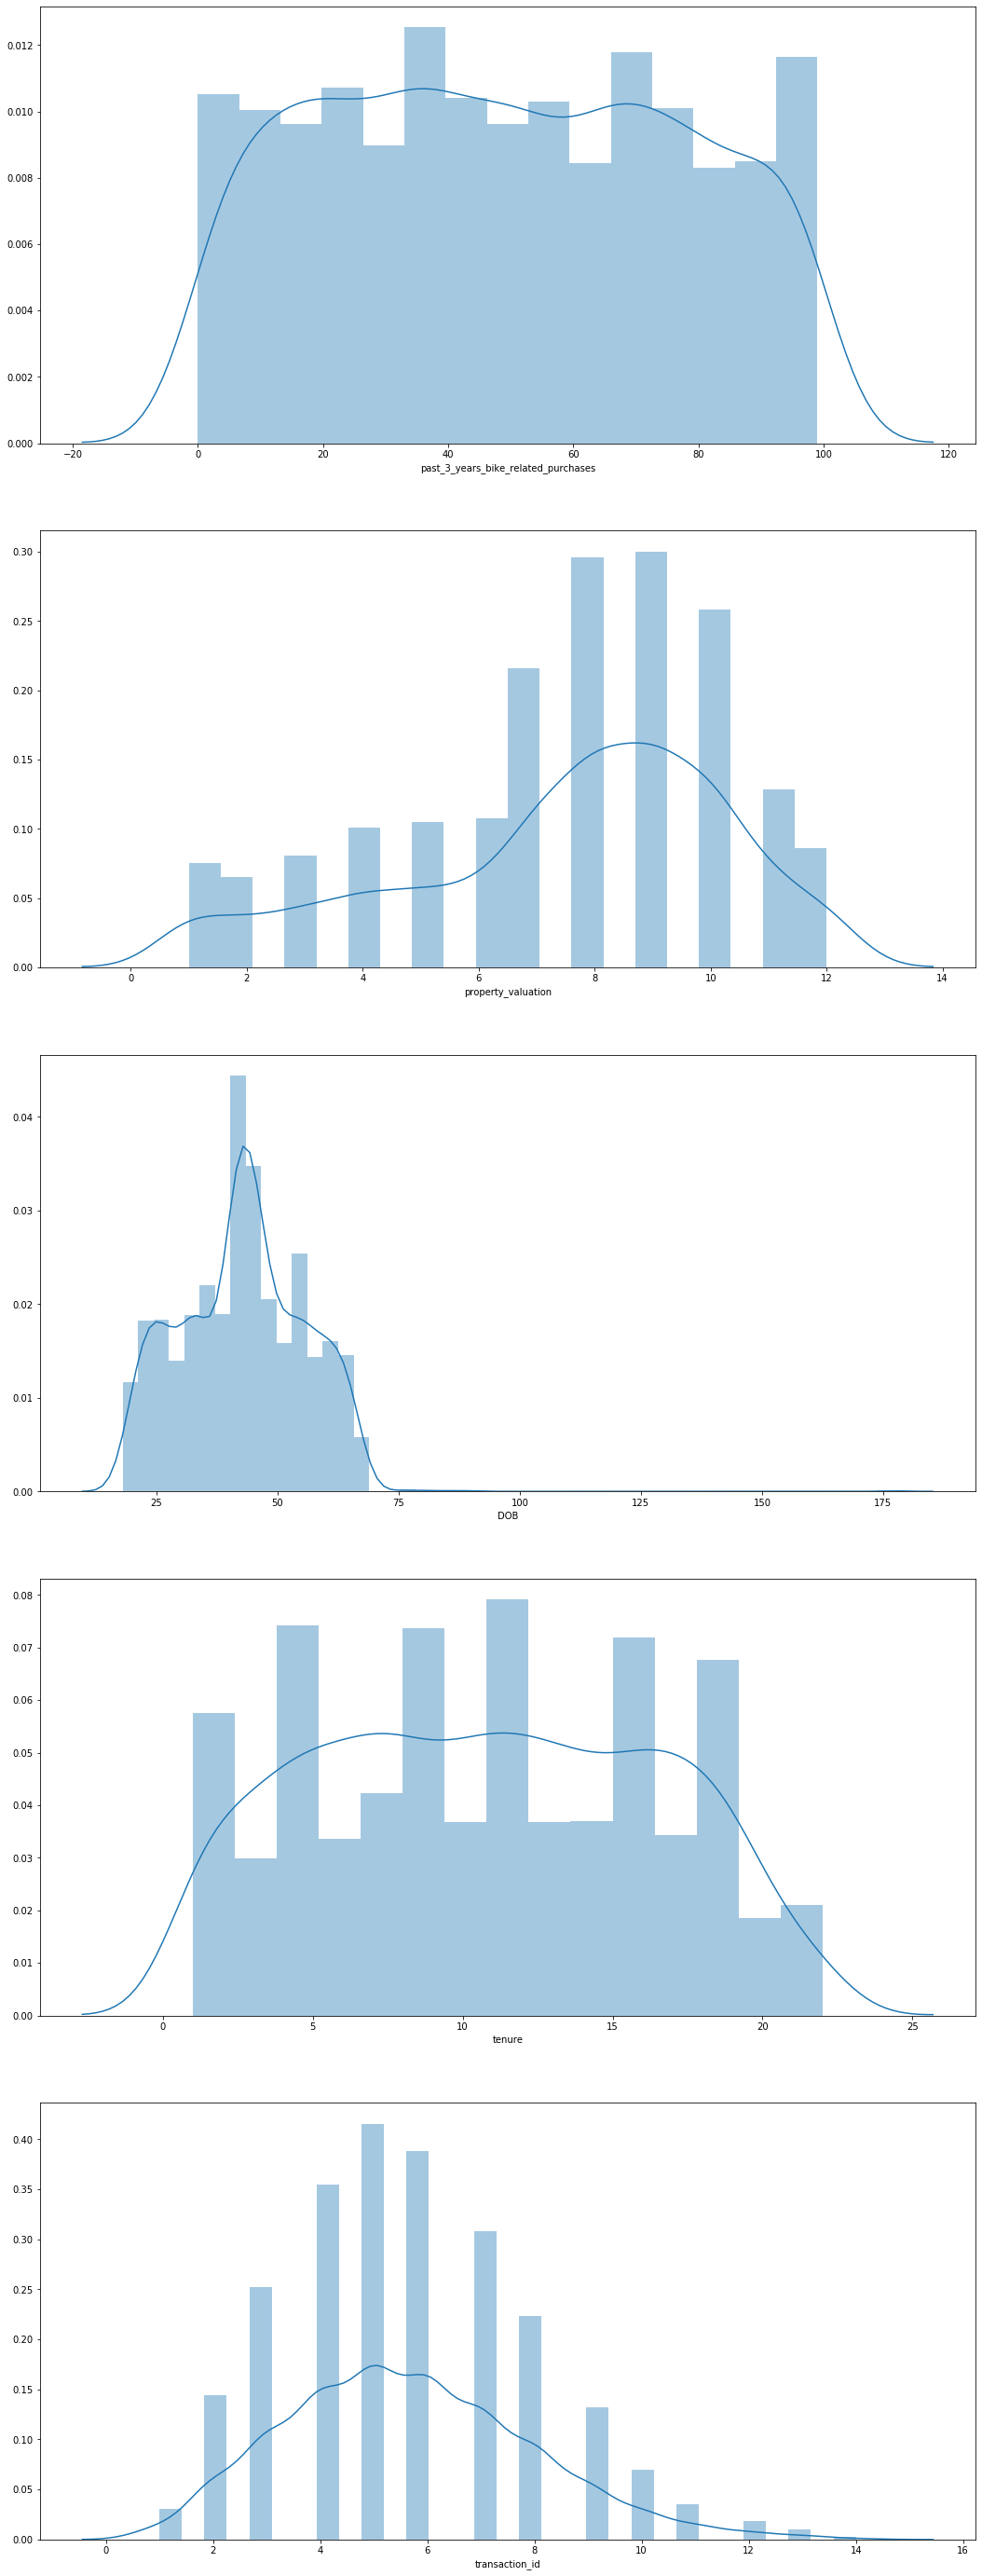

In [53]:
fig, axs = plt.subplots(nrows=5, figsize=(18,50))
# Plot histograms
sns.distplot((Existing_Customers_df["past_3_years_bike_related_purchases"].dropna()), ax=axs[0])
sns.distplot((Existing_Customers_df["property_valuation"].dropna()), ax=axs[1])
sns.distplot((Existing_Customers_df["DOB"].dropna()), ax=axs[2])
sns.distplot((Existing_Customers_df["tenure"].dropna()), ax=axs[3])
sns.distplot((Existing_Customers_df["transaction_id"].dropna()), ax=axs[4])

The DOB data is skewed to the left. All other columns are okay. However, the standard deviation is high. So we will transform all of the data.

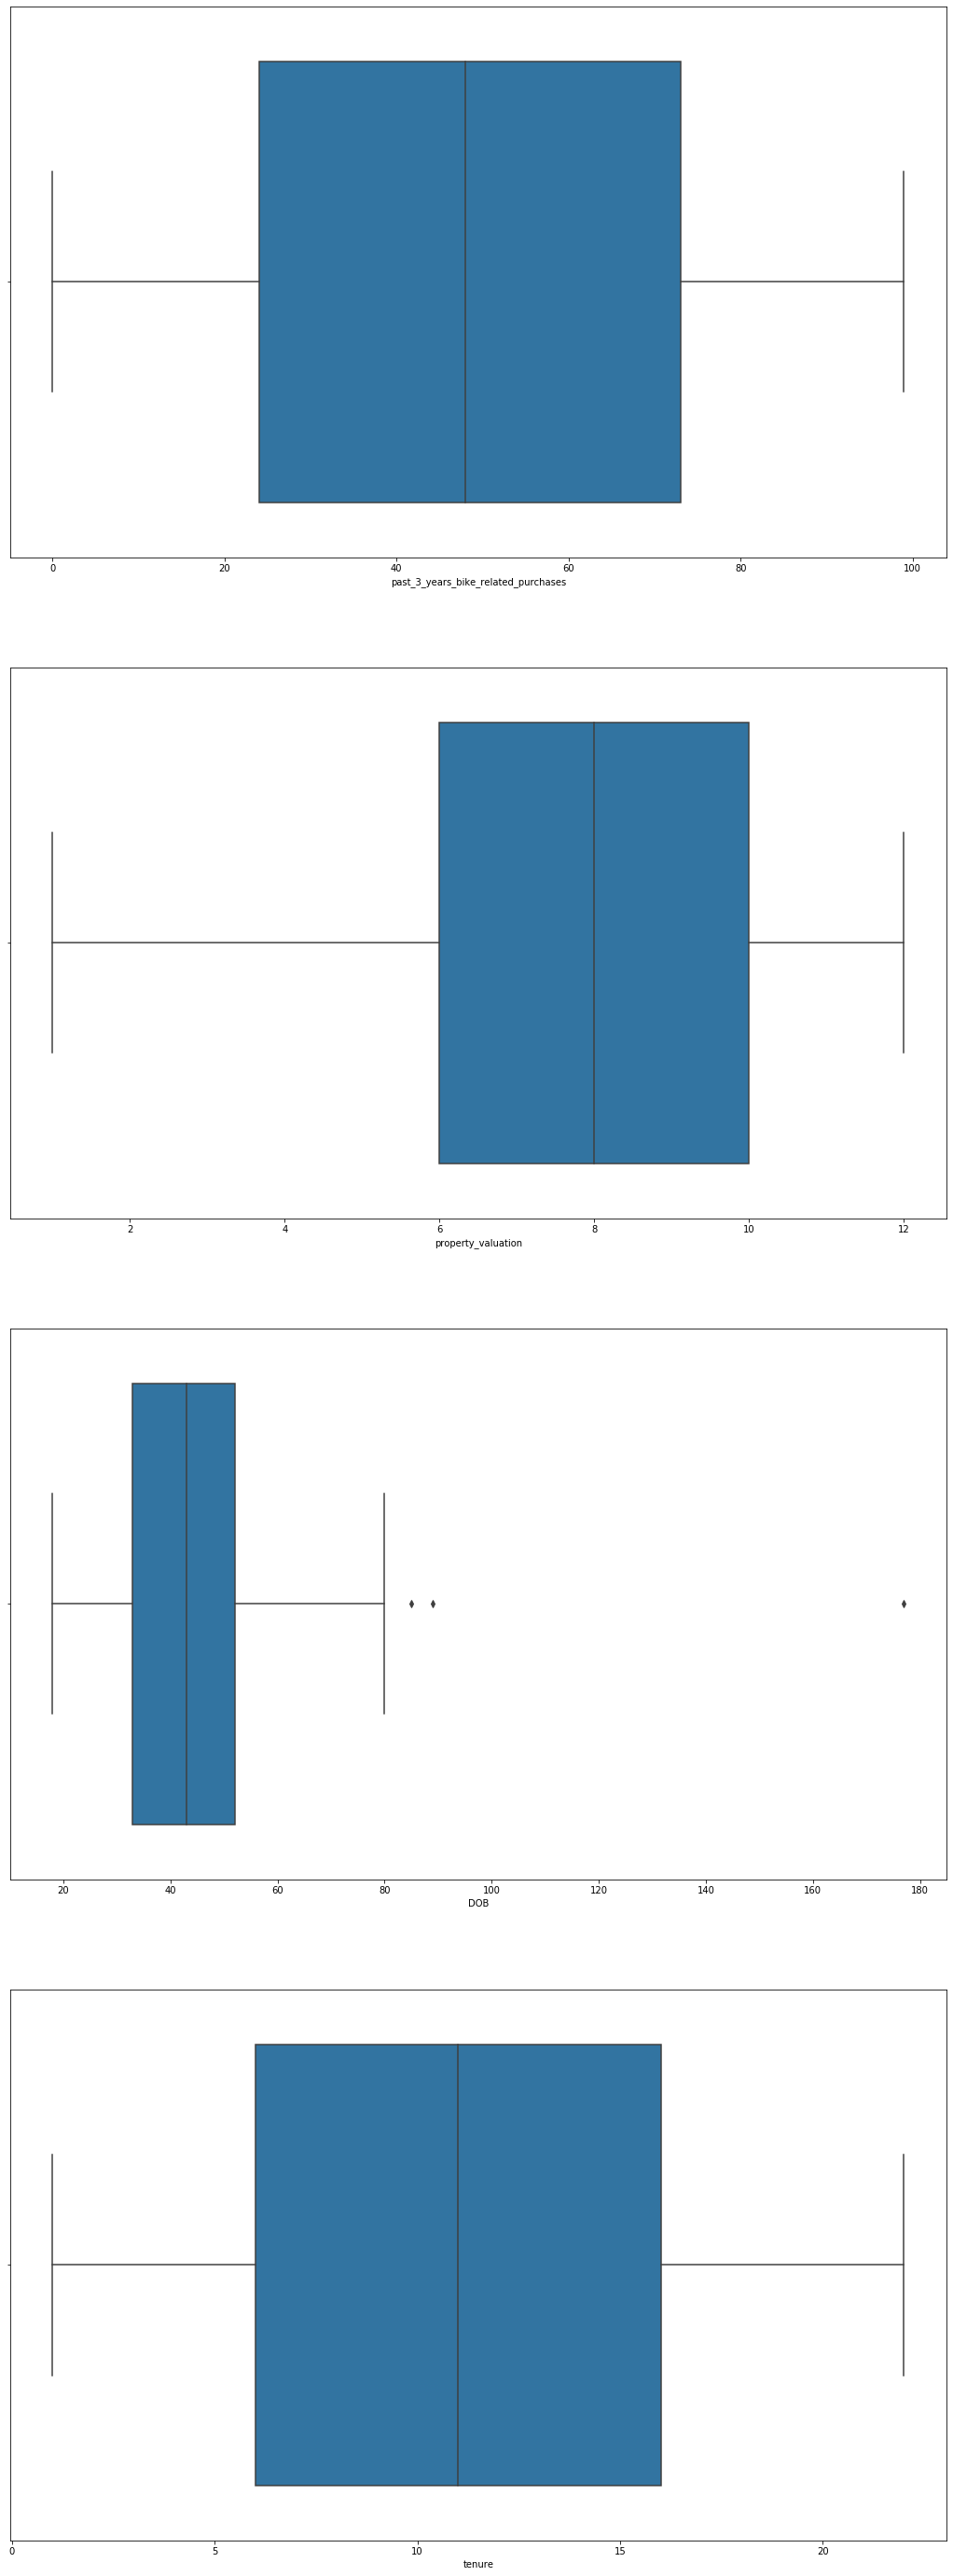

In [54]:
fig, axs = plt.subplots(nrows=4, figsize=(18,50))
# Plot histograms
sns.boxplot((Existing_Customers_df["past_3_years_bike_related_purchases"].dropna()), ax=axs[0])
sns.boxplot((Existing_Customers_df["property_valuation"].dropna()), ax=axs[1])
sns.boxplot((Existing_Customers_df["DOB"].dropna()), ax=axs[2])
sns.boxplot((Existing_Customers_df["tenure"].dropna()), ax=axs[3])

There are some outliers in the DOB data. We will deal with this now. For example, there is an age of about 180 years. This is unrealistic, so we will drop all ages above 80 years.

## Removing Outliers

In [55]:
# 1. Define a function to find the outliers 
def find_outliers_iqr(dataframe, column):   
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results

# 2. Define a function to remove the outliers found
def remove_outliers_iqr(dataframe, column):
    outliers = find_outliers_iqr(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
                        (dataframe[column] > outliers["upper_bound"])].shape                  
        # | means OR
    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) & 
                          (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe
Existing_Customers_df = remove_outliers_iqr(Existing_Customers_df,"DOB")

Removed: 3  outliers


Let us categorise the ages of the customers into age brackets

In [56]:
Existing_Customers_df.loc[Existing_Customers_df["DOB"]<=20,"DOB"]= 0
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=21)&(Existing_Customers_df
                                                           ["DOB"]<=30),"DOB"]= 1
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=31)&(Existing_Customers_df
                                                           ["DOB"]<=40),"DOB"]= 2
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=41)&(Existing_Customers_df
                                                           ["DOB"]<=50),"DOB"]= 3
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=51)&(Existing_Customers_df
                                                           ["DOB"]<=60),"DOB"]= 4
Existing_Customers_df.loc[Existing_Customers_df["DOB"]>=61,"DOB"]= 5

Let us drop the postcode column as we will not use it in our prediction modelling

In [57]:
Existing_Customers_df.drop(columns=["postcode"], inplace=True)

We will categorise the n umber of transaction made by each customer and the total profits made from each customer into three categories. These categories will represent the level of engagement or the value of the customer. We will call these categories: Low value, Intermediate value and High value customers.

Based on the number of Transactions, customers with less than 5 transactions over the specified period are called low value customers, those with between 6 to 10 transactions are intermediate value, and those with more than 11 transactions are high value customers

In [58]:
Existing_Customers_df = Existing_Customers_df.rename(index=str,columns={"transaction_id": "No_of_transactions"})

In [59]:
Existing_Customers_df.loc[Existing_Customers_df["No_of_transactions"]<=5,"No_of_transactions"]= 0
Existing_Customers_df.loc[(Existing_Customers_df
                           ["No_of_transactions"]>=6)&(Existing_Customers_df
                                                       ["No_of_transactions"]<=10),"No_of_transactions"]= 1
#Existing_Customers_df.loc[(Existing_Customers_df["No_of_transactions"]>=9)&(Existing_Customers_df["No_of_transactions"]<=12),"No_of_transactions"]= 3
Existing_Customers_df.loc[Existing_Customers_df["No_of_transactions"]>=11,"No_of_transactions"]= 2

In [60]:
Existing_Customers_df["No_of_transactions"].value_counts()

0    1431
1    1339
2      79
Name: No_of_transactions, dtype: int64

Based on the profitability of a customer, customers with less than 5 transactions over the specified period are called low value customers, those with between 6 to 10 transactions are intermediate value, and those with more than 11 transactions are high value customers

In [61]:
Existing_Customers_df.loc[Existing_Customers_df["Profit_per_customer"]<=2000,"Profit_per_customer"]= 0
Existing_Customers_df.loc[(Existing_Customers_df["Profit_per_customer"]>=2001)&(Existing_Customers_df
                                                           ["Profit_per_customer"]<=4000),"Profit_per_customer"]= 1
Existing_Customers_df.loc[Existing_Customers_df["Profit_per_customer"]>=4001,"Profit_per_customer"]= 2

In [62]:
Existing_Customers_df["Profit_per_customer"].value_counts()

1.0    1254
0.0     827
2.0     768
Name: Profit_per_customer, dtype: int64

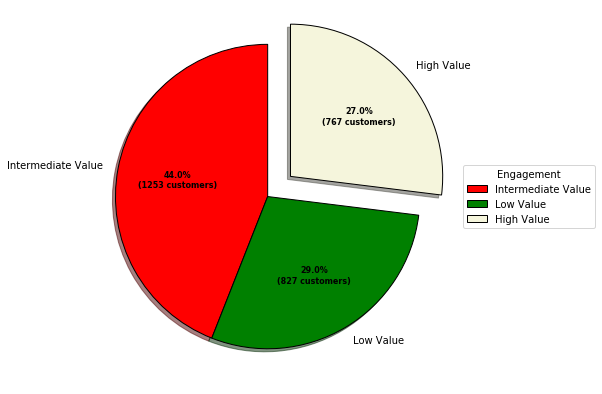

In [63]:
df = Existing_Customers_df["Profit_per_customer"].value_counts()
Engagement = ['Intermediate Value', 'Low Value', 'High Value']
# Creating explode data
explode = (0.0, 0.0, 0.2)  
# Creating color parameters
colors = ( "red", "green", "beige", "orange", "beige", "grey") 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} customers)".format(pct, absolute)  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df, 
                                  autopct = lambda pct: func(pct, df),
                                  explode = explode, 
                                  labels = Engagement,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))  
# Adding legend
ax.legend(wedges, Engagement,
          title ="Engagement",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title(None) 
# show plot
plt.show()

In [64]:
Existing_Customers_df.describe()

,customer_id,property_valuation,No_of_transactions,Profit_per_customer,past_3_years_bike_related_purchases,DOB,owns_car,tenure,state_NSW,state_QLD,...,Financial S,Health,IT,Manufacturi,Property,Retail,Telecommuni,Wealth_seg_,Wealth_seg_,Wealth_seg_
count,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,...,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000
mean,1745.080379,7.493857,0.525448,0.979291,48.895051,2.777817,0.510355,10.754300,0.533521,0.214110,...,0.238329,0.184626,0.044226,0.245700,0.080730,0.106002,0.022113,0.244296,0.255879,0.499824
std,1012.985531,2.837113,0.552193,0.748073,28.579020,1.279752,0.499981,5.692742,0.498963,0.410276,...,0.426136,0.388062,0.205633,0.430577,0.272468,0.307894,0.147077,0.429745,0.436431,0.500088
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,859.000000,6.000000,0.000000,0.000000,24.000000,2.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1733.000000,8.000000,0.000000,1.000000,48.000000,3.000000,1.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2627.000000,10.000000,1.000000,2.000000,73.000000,4.000000,1.000000,16.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3500.000000,12.000000,2.000000,2.000000,99.000000,5.000000,1.000000,22.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Pickling

In [65]:
import os
import pickle

In [66]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "Existing_Customers_df.pkl")

In [67]:
pd.to_pickle(Existing_Customers_df, PICKLE_TRAIN_DIR)

# 2. Model Development

In [68]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "Existing_Customers_df.pkl")

In [69]:
Existing_Customers_df = pd.read_pickle(PICKLE_TRAIN_DIR)

In [70]:
Existing_Customers_df.drop(columns=["customer_id","gender_U","gender_F","gender_M"],inplace=True)

## High Correlation Variables 

**Calculating the correlation of the variables**

In [71]:
correlation3 = Existing_Customers_df.corr()

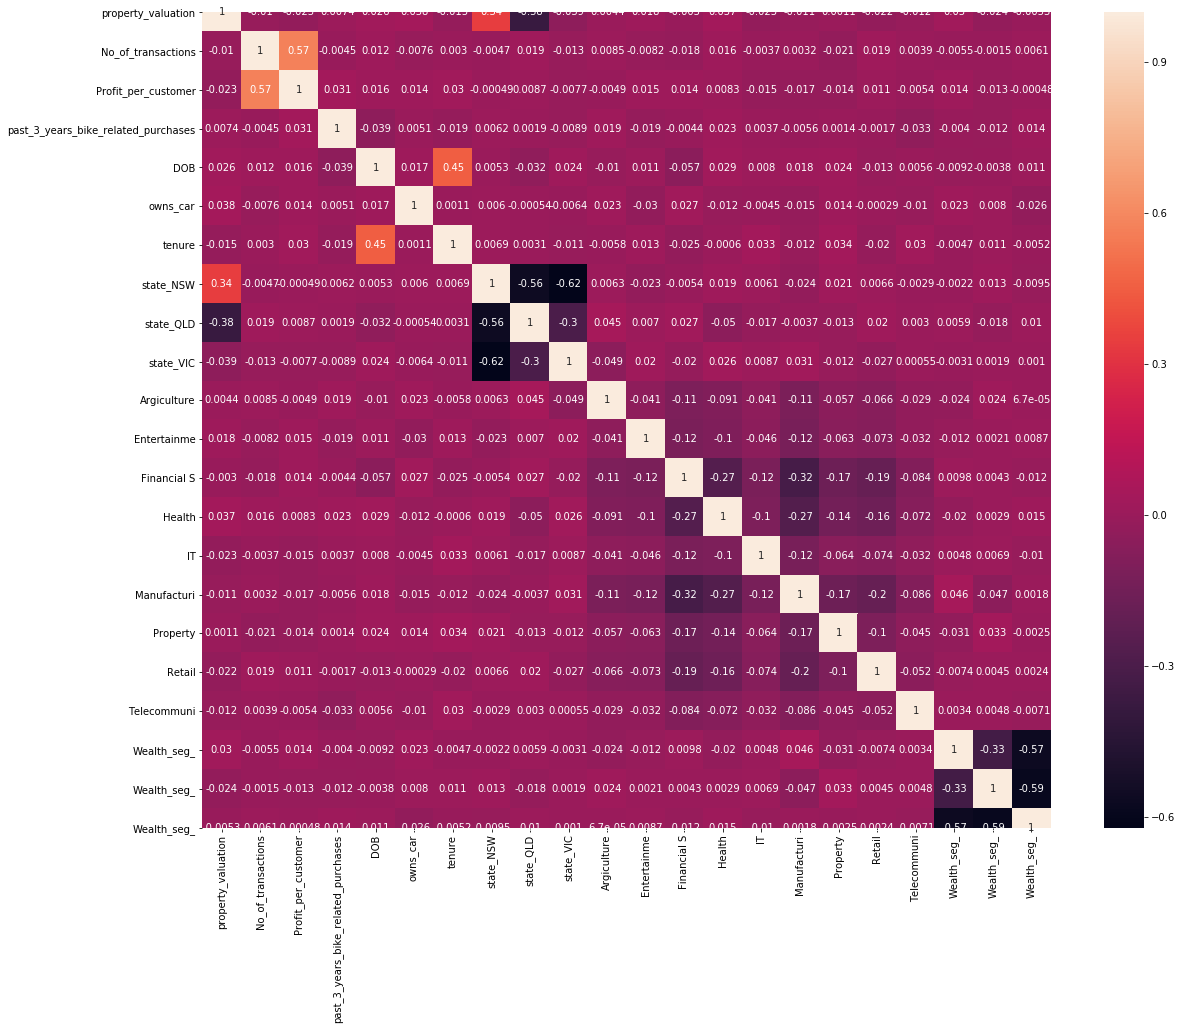

In [72]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation3, xticklabels=correlation3.columns.values, 
            yticklabels=correlation3.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show() 

Becasue of the high correlation between The no. of transactions and the profit per customer columns as well as the DOB and tenure columns, we will drop the No. of Transactions and the Tenure columns

In [73]:
Existing_Customers_df.drop(columns=["No_of_transactions","tenure"],inplace=True)

### Data Transformation

We will now transform the skewed data such as the 'property valuation' column.
For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. We apply this transformation ont the data and get the following:

In [289]:
to_transform = Existing_Customers_df.drop(labels=["Profit_per_customer"],axis=1)

In [290]:
to_transform_log = to_transform + 1
to_transform_log = np.log(to_transform_log)

#Existing_Customers_df["past_3_years_bike_related_purchases"] = Existing_Customers_df["past_3_years_bike_related_purchases"]+1
#Existing_Customers_df["DOB"] = Existing_Customers_df["DOB"]+1
#Existing_Customers_df["tenure"] = Existing_Customers_df["tenure"]+1

In [291]:
#Apply log10 transformation
#Existing_Customers_df["property_valuation_log"] = np.log(Existing_Customers_df["property_valuation_log"])
#Existing_Customers_df["past_3_years_bike_related_purchases"] = np.log10(Existing_Customers_df["past_3_years_bike_related_purchases"])
#Existing_Customers_df["DOB"] = np.log10(Existing_Customers_df["DOB"])
#Existing_Customers_df["tenure"] = np.log10(Existing_Customers_df["tenure"])

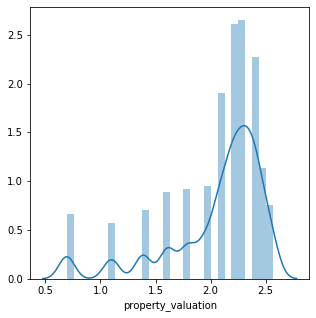

In [292]:
fig, axs = plt.subplots(figsize=(5,5))
# Plot histograms
sns.distplot((to_transform_log["property_valuation"]))

In [293]:
y = Existing_Customers_df["Profit_per_customer"]
X = to_transform_log
#X = Existing_Customers_df.drop(labels=["Profit_per_customer"],axis=1)

In [294]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

X_transform = pd.DataFrame(data = X)
#features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(X_transform.head(n = 5))

,property_valuation,past_3_years_bike_related_purchases,DOB,owns_car,state_NSW,state_QLD,state_VIC,Argiculture,Entertainme,Financial S,Health,IT,Manufacturi,Property,Retail,Telecommuni,Wealth_seg_,Wealth_seg_,Wealth_seg_
0,2.397895,4.543295,1.791759,0.693147,0.693147,0.000000,0.000000,0.0,0.0,0.000000,0.693147,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.693147
1,2.397895,4.406719,1.098612,0.693147,0.693147,0.000000,0.000000,0.0,0.0,0.693147,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.693147
2,2.302585,3.526361,1.609438,0.000000,0.000000,0.693147,0.000000,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.693147
4,2.302585,3.583519,1.609438,0.693147,0.000000,0.000000,0.693147,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.693147,0.0,0.000000,0.693147,0.000000
5,2.302585,1.945910,1.386294,0.693147,0.693147,0.000000,0.000000,0.0,0.0,0.693147,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.693147,0.000000,0.000000


### Shuffle and Split Data##
Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [295]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the 'X' and 'y' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, 
                                                    test_size=0.2, random_state=50)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2279 samples.
Testing set has 570 samples.


## Model Fitting

In [296]:
from time import time
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    beta = 0.5
    
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
          
    # Success
    print("The accuracy results of {} are {}.".format(learner.__class__.__name__, results))
    #table_ = pd.DataFrame(results)
    # Return the results
    return results

In [297]:
# TODO: Import the four supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(n_estimators = 100, random_state=0)
clf_C = AdaBoostClassifier(random_state=0)
clf_D = svm.SVC(kernel = 'rbf', gamma=1, C = 1)

samples_100 = len(y_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

The accuracy results of GaussianNB are {'train_time': 0.020996809005737305, 'pred_time': 0.020003795623779297, 'acc_train': 0.4203598069328653, 'acc_test': 0.3894736842105263}.
The accuracy results of RandomForestClassifier are {'train_time': 0.5373871326446533, 'pred_time': 0.10000896453857422, 'acc_train': 0.9973672663448881, 'acc_test': 0.387719298245614}.
The accuracy results of AdaBoostClassifier are {'train_time': 0.18700623512268066, 'pred_time': 0.05186724662780762, 'acc_train': 0.45458534444931986, 'acc_test': 0.39473684210526316}.
The accuracy results of SVC are {'train_time': 0.43401503562927246, 'pred_time': 0.2928478717803955, 'acc_train': 0.5928038613426941, 'acc_test': 0.39473684210526316}.


### Implementation: Model Tuning

I will use the GridSearch to fine-tune the models. I would focus on the models with the best results i.e. the Random Forest model and the SVM model.

#### Tuning the Random Forest model

In [298]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
#from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# TODO: Initialize the classifier
clf_1 = RandomForestClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"max_depth": [2, 5, 10, 20],
              "n_estimators": [2, 5, 100, 200],
              "min_samples_split": list(range(2, 5)),
              "min_samples_leaf": list(range(1, 5)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# TODO: Make an fbeta_score scoring object using make_scorer()
#crit = accuracy_score

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj_RF = GridSearchCV(clf_1, parameters, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit_RF = grid_obj_RF.fit(X_train, y_train)

# Get the estimator
best_clf_1 = grid_fit_RF.best_estimator_

# Make predictions using the unoptimized and model
training_RF = (clf_1.fit(X_train, y_train)).predict(X_train)
best_training_RF = best_clf_1.predict(X_train)

# Make predictions using the unoptimized and model
predictions_RF = (clf_1.fit(X_train, y_train)).predict(X_test)
best_predictions_RF = best_clf_1.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, training_RF)))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_RF)))
print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_training_RF)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_RF)))

C:\Users\preco\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on training data: 0.9719
Accuracy score on testing data: 0.3789

Optimized Model
------
Accuracy score on training data: 0.4471
Final accuracy score on the testing data: 0.4123


#### HyperParameter Tuning for the SVM Predictor

In [299]:
from sklearn.utils import shuffle
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 2, 10, 100, 1000]}]
clf_2 = svm.SVC()
grid_obj = GridSearchCV(clf_2, params_grid, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_2 = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
training_SVM = (clf_2.fit(X_train, y_train)).predict(X_train)
best_training_SVM = best_clf_2.predict(X_train)

# Make predictions using the unoptimized and model
predictions_SVM = (clf_2.fit(X_train, y_train)).predict(X_test)
best_predictions_SVM = best_clf_2.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, training_SVM)))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_SVM)))

print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_training_SVM)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_SVM)))

C:\Users\preco\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\preco\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Unoptimized model
------
Accuracy score on training data: 0.4471
Accuracy score on testing data: 0.4123

Optimized Model
------
Accuracy score on training data: 0.4471
Final accuracy score on the testing data: 0.4123


In [300]:
result = {"Algorithm" : ["SVM", "RandomForest"],
        "Unoptimised Test Set Accuracy": [((accuracy_score(y_test, predictions_SVM))*100).astype(int),
                                    ((accuracy_score(y_test, predictions_RF))*100).astype(int)],
          "Optimised Test Set Accuracy":[(accuracy_score(y_test, best_predictions_SVM)*100).astype(int), 
                            (accuracy_score(y_test, best_predictions_RF)*100).astype(int)]}

result_table=pd.DataFrame(result)
result_table

,Algorithm,Unoptimised Test Set Accuracy,Optimised Test Set Accuracy
0,SVM,41,41
1,RandomForest,37,41


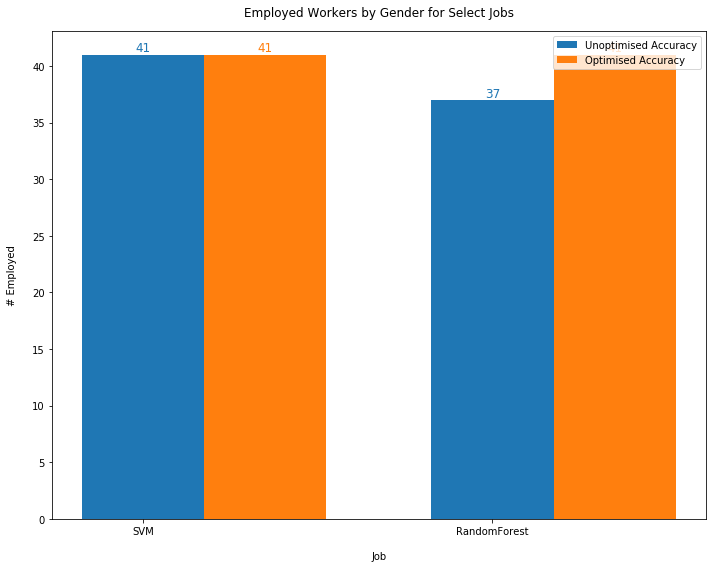

In [301]:
fig, ax = plt.subplots(figsize=(10, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
labels = result_table['Algorithm']

x = np.arange(len(labels))

# Define bar width. We need this to offset the second bar.
bar_width = 0.35

b1 = ax.bar(x, result_table['Unoptimised Test Set Accuracy'],
            width = bar_width, label = 'Unoptimised Accuracy')
# Same thing, but offset the x.
b2 = ax.bar(x+bar_width, result_table['Optimised Test Set Accuracy'],
            width = bar_width, label = 'Optimised Accuracy')

# Fix the x-axes.

ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add legend.
ax.legend()

# Add axis and chart labels.
ax.set_xlabel('Job', labelpad=15)
ax.set_ylabel('# Employed', labelpad=15)
ax.set_title('Employed Workers by Gender for Select Jobs', pad=15)

fig.tight_layout()

# You can just append this to the code above.

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

It is seen that the accuracy scores of both optimised models are 41%. So we can use any of the models for our prediction. We will use the SVM model

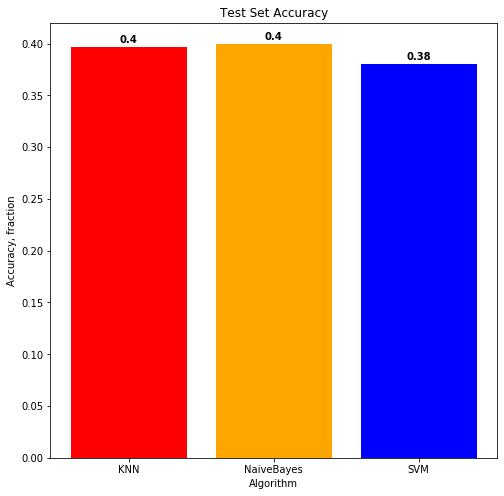

In [790]:
a=result_table["Test Set Accuracy"]
# compute percentage of each format
percentage = []
for i in range(result_table.shape[0]):
    pct = a[i]
    percentage.append(round(pct,2))
result_table['Percentage'] = percentage
# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(result_table["Algorithm"],result_table["Test Set Accuracy"], color = colors_list)
plt.title('Test Set Accuracy')
# giving X and Y labels
plt.xlabel("Algorithm")
plt.ylabel("Accuracy, fraction")
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(result_table.Percentage[i]),
             ha='center',
             weight='bold')
    i+=1
plt.show()

# Let us work on the New Customer List

In [213]:
pd.DataFrame({"Data type":NewCustomers_df.dtypes})

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [214]:
NewCustomers_df = NewCustomers_df[["property_valuation","past_3_years_bike_related_purchases","DOB","owns_car",
                                   "tenure","state","job_industry_category","wealth_segment"]]

C:\Users\preco\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [127]:
NewCustomers_df.isnull().sum()
pd.DataFrame({"Missing Data (%)":NewCustomers_df.isnull().sum()/len(NewCustomers_df.index)*100})

,Missing Data (%)
property_valuation,0.0
past_3_years_bike_related_purchases,0.0
DOB,1.7
owns_car,0.0
tenure,0.0
state,0.0
job_industry_category,16.5
wealth_segment,0.0


In [128]:
NewCustomers_df["state"] = NewCustomers_df["state"].replace(to_replace =["Victoria"], value = "VIC")
NewCustomers_df["state"] = NewCustomers_df["state"].replace(to_replace =["New South Wales"], value = "NSW")

In [129]:
NewCustomers_df = NewCustomers_df.dropna()

In [130]:
#Define a function that converts the dates to months
def convert_date_to_years(reference_date, dataframe, column):
    """
    Input a column with timedeltas and return years
    """
    delta_time = REFERENCE_DATE - dataframe[column]
    years = (delta_time / np.timedelta64(1, "Y")).astype(int)
    
    #int returns the number of months as a whole number, not decimal
    
    return years

In [131]:
# Create reference date as provided
REFERENCE_DATE = datetime.datetime(2021,1,1)

In [132]:
NewCustomers_df["DOB"] = pd.to_datetime(NewCustomers_df["DOB"],format='%Y-%m-%d')

In [133]:
NewCustomers_df["DOB"] = convert_date_to_years(REFERENCE_DATE, NewCustomers_df, "DOB")

### Data Visualisation

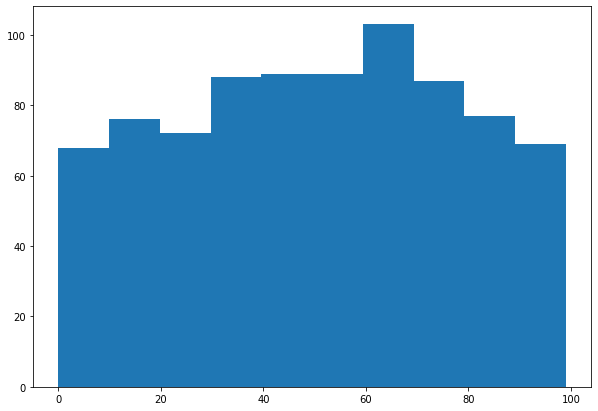

In [134]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(NewCustomers_df["past_3_years_bike_related_purchases"], bins = 10)
# Show plot
plt.show()

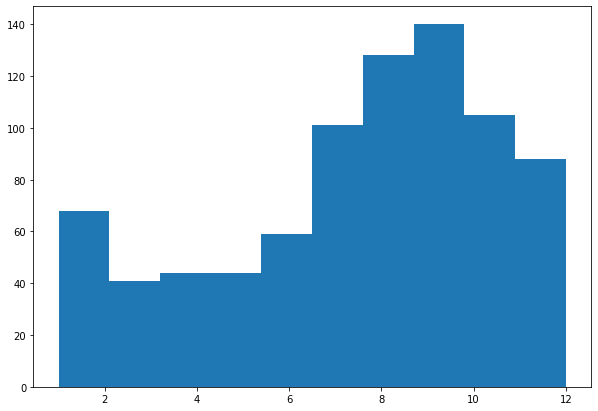

In [135]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(NewCustomers_df["property_valuation"], bins = 10)  
# Show plot
plt.show()

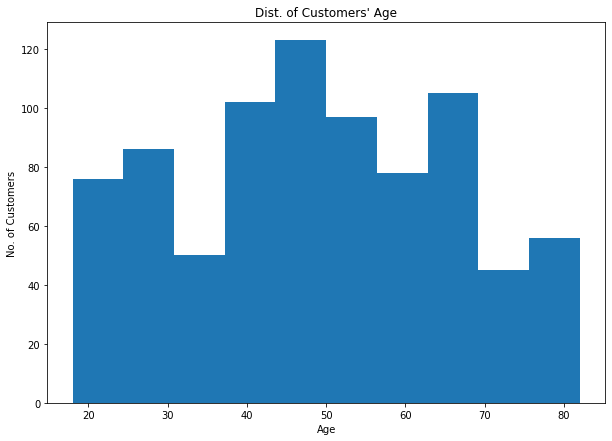

In [136]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(NewCustomers_df["DOB"], bins = 10)
plt.title("Dist. of Customers' Age")
plt.xlabel("Age")
plt.ylabel("No. of Customers") 
# Show plot
plt.show()

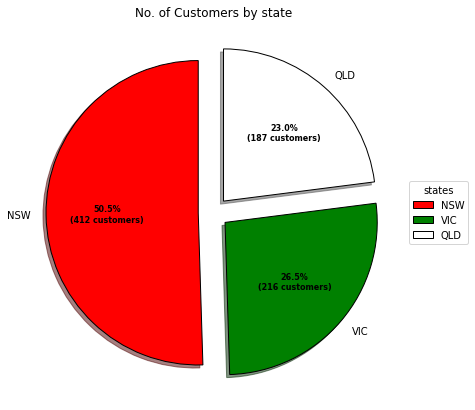

In [137]:
df1 = NewCustomers_df["state"].value_counts()
states = ['NSW', 'VIC', 'QLD']

# Creating explode data
explode = (0.1, 0.1, 0.1)
  
# Creating color parameters
colors = ( "red", "green", "white", "indigo", "beige")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} customers)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df1, 
                                  autopct = lambda pct: func(pct, df1),
                                  explode = explode, 
                                  labels = states,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))  
# Adding legend
ax.legend(wedges, states,
          title ="states",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("No. of Customers by state") 
# show plot
plt.show()

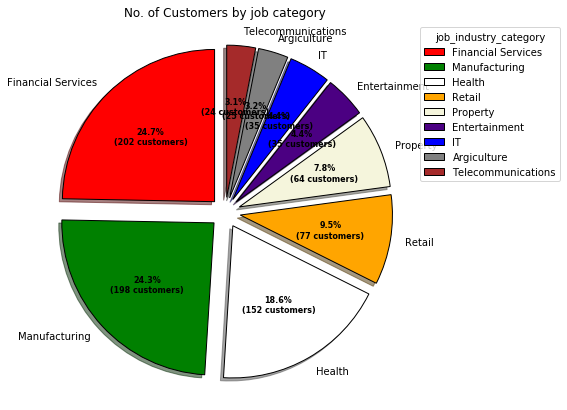

In [138]:
df2 = NewCustomers_df["job_industry_category"].value_counts()
job = ['Financial Services', 'Manufacturing', 'Health', 'Retail', 'Property', 'Entertainment',
         'IT', 'Argiculture', 'Telecommunications']
# Creating explode data
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
# Creating color parameters
colors = ( "red", "green", "white", "orange", "beige","indigo", "blue", "grey", "brown") 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} customers)".format(pct, absolute)  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df2, 
                                  autopct = lambda pct: func(pct, df2),
                                  explode = explode, 
                                  labels = job,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))  
# Adding legend
ax.legend(wedges, job,
          title ="job_industry_category",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("No. of Customers by job category") 
# show plot
plt.show()

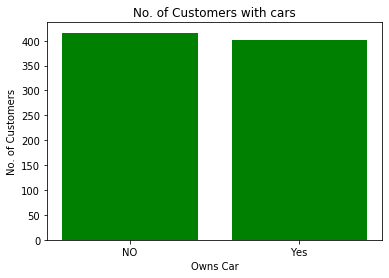

In [139]:
df3 = NewCustomers_df["owns_car"].value_counts()
job = ['NO', 'Yes']
# Plot the data using bar() method
plt.bar(job, df3, color='g')
plt.title("No. of Customers with cars")
plt.xlabel("Owns Car")
plt.ylabel("No. of Customers") 
# Show the plot
plt.show()

### Feature Engineering

In [140]:
#In the column has_gas, replace t with Tr`1ue or 1 and f with False or 0 . 
#This process is known as onehot encoding
NewCustomers_df["owns_car"] = NewCustomers_df["owns_car"].replace(["Yes", "No"],[1,0])

In [141]:
NewCustomers_df["state"] = NewCustomers_df["state"].astype("category")

In [142]:
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": NewCustomers_df["state"].value_counts()})
# Create 3 dummy variables for each variable
state_dummies = pd.get_dummies(NewCustomers_df["state"], prefix = "state")
# We rename columns for simplicity
state_dummies.columns = [col_name[:11] for col_name in state_dummies.columns]

In [143]:
# Transform column into categorical data type
NewCustomers_df["job_industry_category"] = NewCustomers_df["job_industry_category"].astype("category")
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": NewCustomers_df["job_industry_category"].value_counts()})
# Create 3 dummy variables for each variable
job_industry_category_dummies = pd.get_dummies(NewCustomers_df["job_industry_category"], prefix = None)
# We rename columns for simplicity
job_industry_category_dummies.columns = [col_name[:11] for col_name in job_industry_category_dummies.columns]

In [144]:
# Transform column into categorical data type
NewCustomers_df["wealth_segment"] = NewCustomers_df["wealth_segment"].astype("category")
# How many categories of channel sales are there?
pd.DataFrame({"Samples in category": NewCustomers_df["wealth_segment"].value_counts()})
# Create 3 dummy variables for each variable
wealth_segment_dummies = pd.get_dummies(NewCustomers_df["wealth_segment"], prefix = "wealth_segment")
# We rename columns for simplicity
wealth_segment_dummies.columns = [col_name[:11] for col_name in wealth_segment_dummies.columns]

### Merge the dummy variables to main dataframe

In [145]:
NewCustomers_df = pd.merge(NewCustomers_df, state_dummies, left_index=True, right_index=True)
NewCustomers_df = pd.merge(NewCustomers_df, job_industry_category_dummies, left_index=True, right_index=True)
NewCustomers_df = pd.merge(NewCustomers_df, wealth_segment_dummies, left_index=True, right_index=True)

In [146]:
# Let us remove the old categorical columns
NewCustomers_df.drop(columns=["state","job_industry_category","wealth_segment"],inplace=True)
NewCustomers_df

,property_valuation,past_3_years_bike_related_purchases,DOB,owns_car,tenure,state_NSW,state_QLD,state_VIC,Argiculture,Entertainme,Financial S,Health,IT,Manufacturi,Property,Retail,Telecommuni,wealth_segm,wealth_segm,wealth_segm
0,6,86,63,1,14,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,11,69,50,0,16,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,5,10,46,0,10,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,64,41,1,5,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,9,34,55,0,19,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,60,61,0,9,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
996,10,22,19,0,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
997,2,17,66,1,15,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
998,2,30,68,1,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


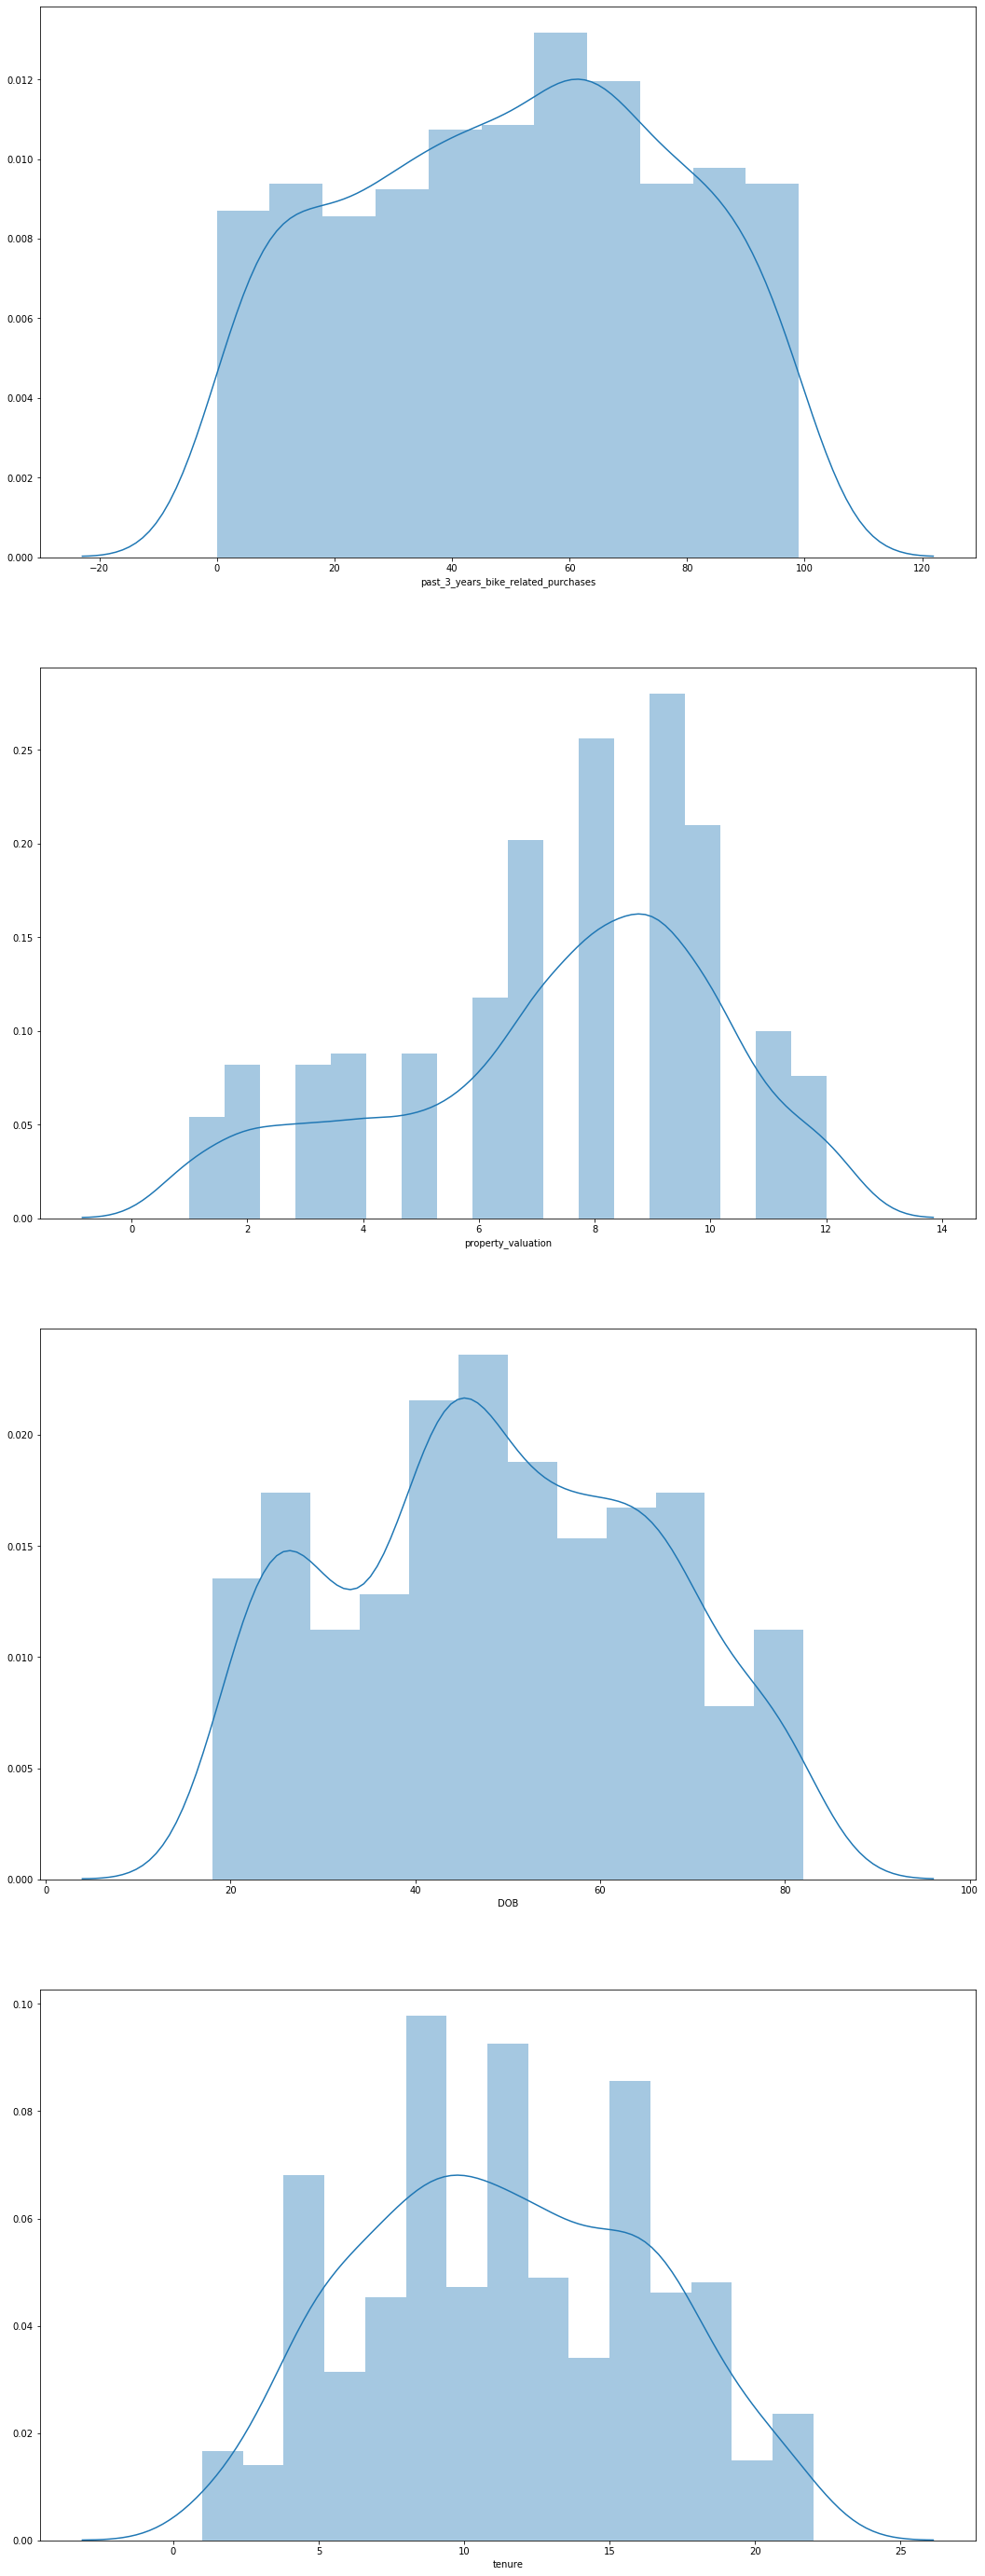

In [147]:
fig, axs = plt.subplots(nrows=4, figsize=(18,50))
# Plot histograms
sns.distplot((NewCustomers_df["past_3_years_bike_related_purchases"].dropna()), ax=axs[0])
sns.distplot((NewCustomers_df["property_valuation"].dropna()), ax=axs[1])
sns.distplot((NewCustomers_df["DOB"].dropna()), ax=axs[2])
sns.distplot((NewCustomers_df["tenure"].dropna()), ax=axs[3])

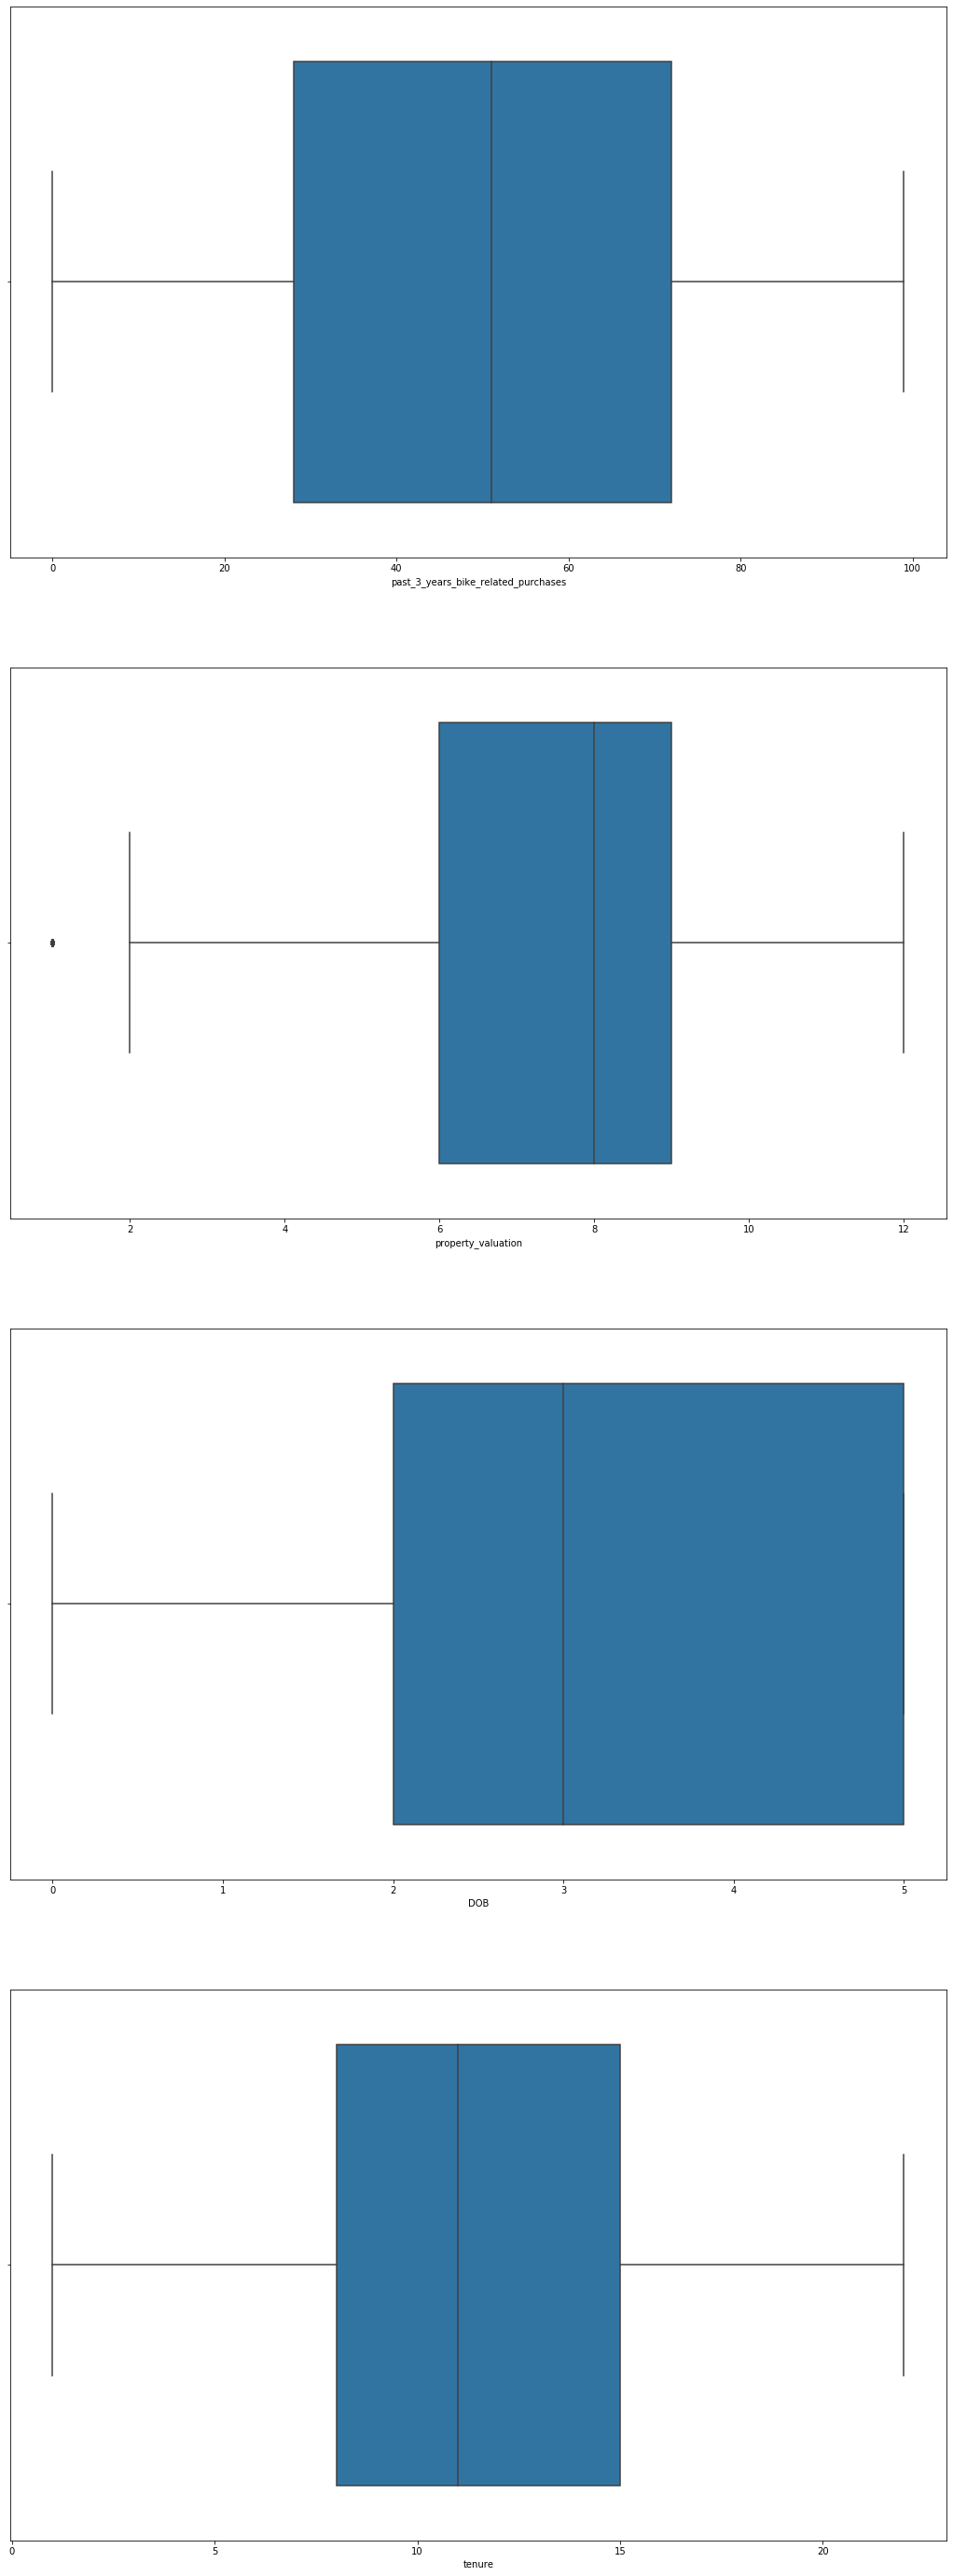

In [150]:
fig, axs = plt.subplots(nrows=4, figsize=(18,50))
# Plot histograms
sns.boxplot((NewCustomers_df["past_3_years_bike_related_purchases"].dropna()), ax=axs[0])
sns.boxplot((NewCustomers_df["property_valuation"].dropna()), ax=axs[1])
sns.boxplot((NewCustomers_df["DOB"].dropna()), ax=axs[2])
sns.boxplot((NewCustomers_df["tenure"].dropna()), ax=axs[3])

In [148]:
NewCustomers_df.loc[NewCustomers_df["DOB"]<=20,"DOB"]= 0
NewCustomers_df.loc[(NewCustomers_df["DOB"]>=21)&(NewCustomers_df["DOB"]<=30),"DOB"]= 1
NewCustomers_df.loc[(NewCustomers_df["DOB"]>=31)&(NewCustomers_df["DOB"]<=40),"DOB"]= 2
NewCustomers_df.loc[(NewCustomers_df["DOB"]>=41)&(NewCustomers_df["DOB"]<=50),"DOB"]= 3
NewCustomers_df.loc[(NewCustomers_df["DOB"]>=51)&(NewCustomers_df["DOB"]<=60),"DOB"]= 4
NewCustomers_df.loc[NewCustomers_df["DOB"]>=61,"DOB"]= 5

In [149]:
Existing_Customers_df.loc[Existing_Customers_df["DOB"]<=20,"DOB"]= 0
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=21)&(Existing_Customers_df
                                                           ["DOB"]<=30),"DOB"]= 1
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=31)&(Existing_Customers_df
                                                           ["DOB"]<=40),"DOB"]= 2
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=41)&(Existing_Customers_df
                                                           ["DOB"]<=50),"DOB"]= 3
Existing_Customers_df.loc[(Existing_Customers_df
                           ["DOB"]>=51)&(Existing_Customers_df
                                                           ["DOB"]<=60),"DOB"]= 4
Existing_Customers_df.loc[Existing_Customers_df["DOB"]>=61,"DOB"]= 5

In [151]:
# 1. Define a function to find the outliers 
def find_outliers_iqr(dataframe, column):
    
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results

# 2. Define a function to remove the outliers found
def remove_outliers_iqr(dataframe, column):
   
    outliers = find_outliers_iqr(dataframe, column)
    
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
                        (dataframe[column] > outliers["upper_bound"])].shape
                        
        # | means OR

    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) & 
                          (dataframe[column] < outliers["upper_bound"])]

    print("Removed:", removed[0], " outliers")
    return dataframe

In [152]:
Existing_Customers_df = remove_outliers_iqr(Existing_Customers_df,"property_valuation")

Removed: 220  outliers


In [153]:
NewCustomers_df["property_valuation"] = NewCustomers_df["property_valuation"]+1
#NewCustomers_df["past_3_years_bike_related_purchases"] = NewCustomers_df["past_3_years_bike_related_purchases"]+1
#NewCustomers_df["DOB"] = NewCustomers_df["DOB"]+1
#NewCustomers_df["tenure"] = NewCustomers_df["tenure"]+1

In [154]:
#Apply log10 transformation
NewCustomers_df["property_valuation"] = np.log10(NewCustomers_df["property_valuation"])
#NewCustomers_df["past_3_years_bike_related_purchases"] = np.log10(NewCustomers_df["past_3_years_bike_related_purchases"])
#NewCustomers_df["DOB"] = np.log10(NewCustomers_df["DOB"])
#NewCustomers_df["tenure"] = np.log10(NewCustomers_df["tenure"])

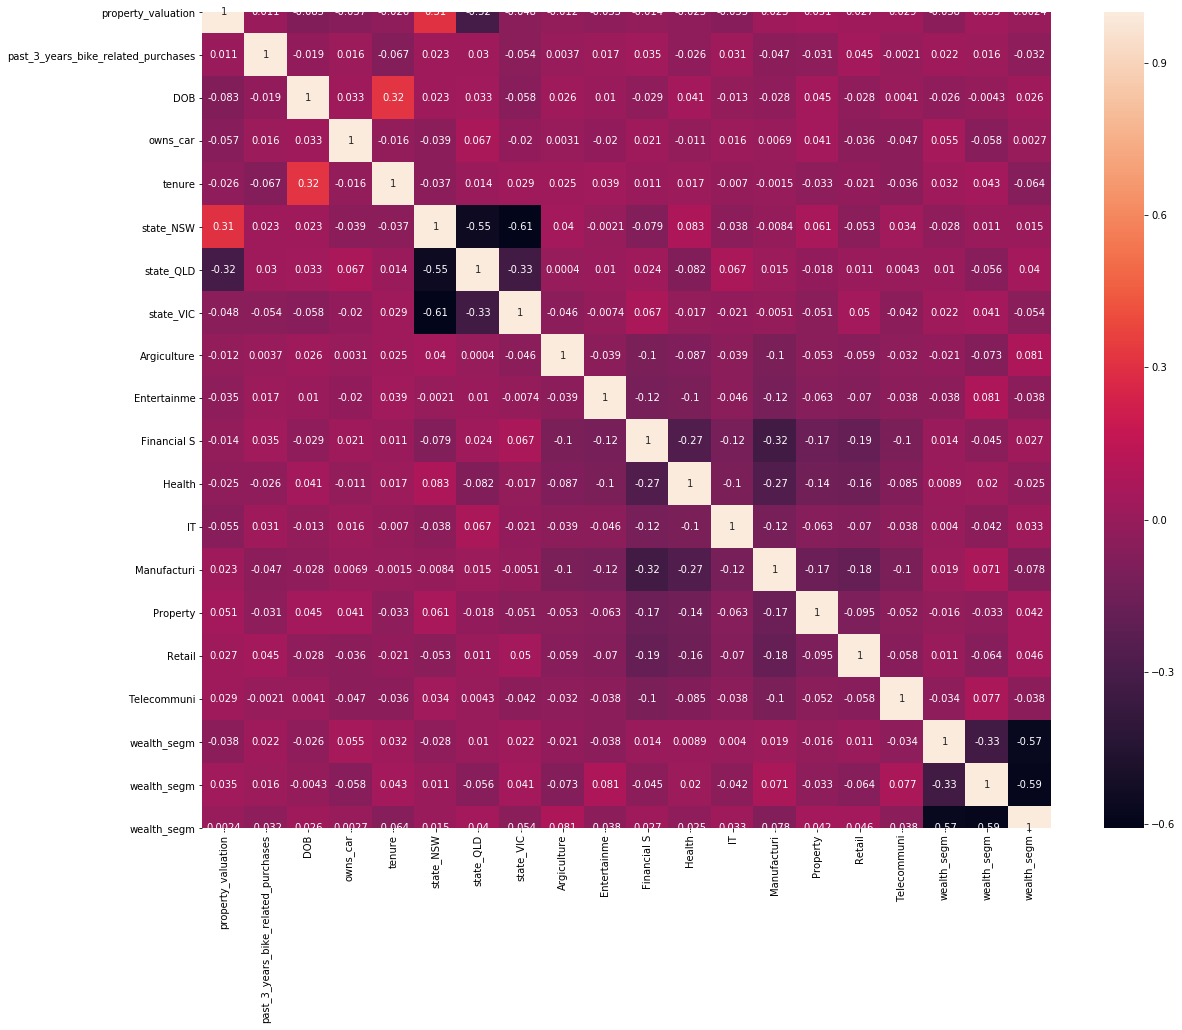

In [155]:
correlation4 = NewCustomers_df.corr()
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation4, xticklabels=correlation4.columns.values, 
            yticklabels=correlation4.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show() 

In [156]:
NewCustomers_df.drop(columns=["tenure"],inplace=True)

In [157]:
NewCustomers_df

,property_valuation,past_3_years_bike_related_purchases,DOB,owns_car,state_NSW,state_QLD,state_VIC,Argiculture,Entertainme,Financial S,Health,IT,Manufacturi,Property,Retail,Telecommuni,wealth_segm,wealth_segm,wealth_segm
0,0.845098,86,5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.079181,69,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.778151,10,3,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.301030,64,3,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1.000000,34,4,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.903090,60,5,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
996,1.041393,22,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
997,0.477121,17,5,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
998,0.477121,30,5,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


### Predicting the segments of the new customers

In [162]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

NewCustomers_df_transform = pd.DataFrame(data = NewCustomers_df)
#features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(NewCustomers_df_transform.head(n = 5))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.221617,1.296309,1.187099,1.017264,-1.009828,1.830591,-0.600887,-0.181186,-0.21456,-0.572645,-0.477732,-0.21456,1.763676,-0.291343,-0.324662,-0.177555,-0.565115,-0.580174,0.987849
1,0.993301,0.678710,-0.135853,-0.983029,0.990267,-0.546272,-0.600887,-0.181186,-0.21456,-0.572645,-0.477732,-0.21456,-0.566998,3.432383,-0.324662,-0.177555,-0.565115,-0.580174,0.987849
2,-0.569078,-1.464720,-0.135853,-0.983029,-1.009828,-0.546272,1.664207,-0.181186,-0.21456,1.746283,-0.477732,-0.21456,-0.566998,-0.291343,-0.324662,-0.177555,1.769552,-0.580174,-1.012301
3,-3.045390,0.497063,-0.135853,1.017264,-1.009828,1.830591,-0.600887,-0.181186,-0.21456,-0.572645,-0.477732,-0.21456,1.763676,-0.291343,-0.324662,-0.177555,1.769552,-0.580174,-1.012301
4,0.582342,-0.592817,0.525623,-0.983029,0.990267,-0.546272,-0.600887,-0.181186,-0.21456,1.746283,-0.477732,-0.21456,-0.566998,-0.291343,-0.324662,-0.177555,1.769552,-0.580174,-1.012301


In [212]:
# Make predictions with the classifier:
#pred_KNN_new = neigh.predict(NewCustomers_df)
#pred_NB_New = gnb.predict(NewCustomers_df)
pred_SVM_New = best_clf_1.predict(NewCustomers_df_transform)
df4 = pd.DataFrame(pred_SVM_New)
df5 = df4[0].value_counts()
df5

1.0    818
Name: 0, dtype: int64

ValueError: 'explode' must be of length 'x'

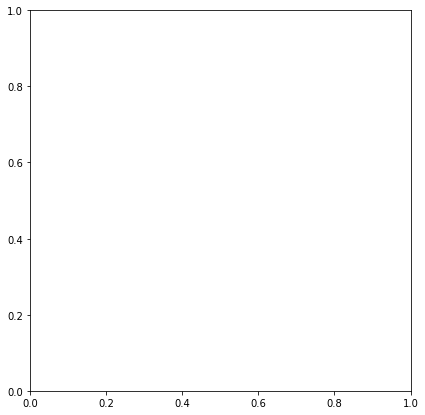

In [172]:
df4 = pd.DataFrame(pred_SVM_New)
customer_segmentation = ['Low Value']
#, 'Intermediate Value', 'High Value']
df5 = df4[0].value_counts()

# Creating explode data
explode = (0.1, 0.1, 0.1)
  
# Creating color parameters
colors = ( "red", "green", "beige", "indigo", "white")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} customers)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df5, 
                                  autopct = lambda pct: func(pct, df5),
                                  explode = explode, 
                                  labels = customer_segmentation,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))  
# Adding legend
ax.legend(wedges, customer_segmentation,
          title ="states",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customer Segmentation") 
# show plot
plt.show()